In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Зчитування даних

In [93]:
# train = pd.read_csv("E:/Install/Statistics/Kaggle Inter-American Development Bank/train.csv/train.csv", index_col = "Id")
train = pd.read_csv("E:/Install/Statistics/Kaggle Inter-American Development Bank/train.csv/train.csv")

In [8]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [94]:
# test = pd.read_csv("E:/Install/Statistics/Kaggle Inter-American Development Bank/test.csv/test.csv", index_col = "Id")
test = pd.read_csv("E:/Install/Statistics/Kaggle Inter-American Development Bank/test.csv/test.csv")

In [66]:
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


## Первинний аналіз даних

In [11]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


### Маємо 143 ознаки: 8 - float64, 130 - int64, 5 - object

## Розглянемо детально ознаки типу 'object'

In [15]:
train.select_dtypes(include='object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [42]:
# train['Id'].value_counts()
train['Id'].size

9557

### Дослідимо ознаку 'idhogar'

In [54]:
train['idhogar'].unique().size
# train['idhogar'].value_counts()

2988

count    2988.000000
mean        3.198461
std         1.590829
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
dtype: float64


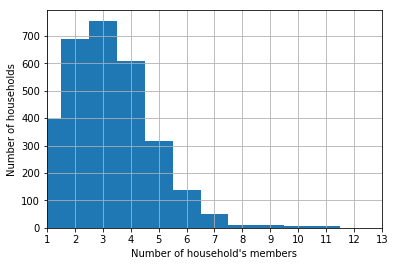

In [55]:
households = train.groupby('idhogar').apply(lambda x: len(x))
print(households.describe())
plt.hist(households, bins=range(1, 13), align='left')
plt.xlabel("Number of household's members")
plt.ylabel('Number of households')
plt.grid(True)
plt.xlim([1, 13])
plt.xticks(range(1, 14))
plt.show()

### У нашому наборі даних є 2988 домогосподарств, кожен з яких має в середньому 3 учасника, максимум 13 учасників. Розподіл близький до лог-нормального, як очікувалося.

### Унікальні значення для ознак: 'dependency, edjefe, edjefa'

In [95]:
print(train['dependency'].unique())
print(train['edjefe'].unique())
print(train['edjefa'].unique())

['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


### Можемо замінити 'no' = 0 і 'yes' = 1

In [96]:
di = {"yes": 1, "no": 0}
train['dependency'].replace(di, inplace=True)
train['edjefe'].replace(di, inplace=True)
train['edjefa'].replace(di, inplace=True)

### Конвертуємо тип 'object' в 'float'

In [97]:
train['dependency'] = train['dependency'].astype(float)
train['edjefe'] = train['edjefe'].astype(float)
train['edjefa'] = train['edjefa'].astype(float)

In [99]:
print(train['dependency'].unique())
print(train['edjefe'].unique())
print(train['edjefa'].unique())

[0.         8.         1.         3.         0.5        0.25
 2.         0.66666669 0.33333334 1.5        0.40000001 0.75
 1.25       0.2        2.5        1.2        4.         1.3333334
 2.25       0.22222222 5.         0.83333331 0.80000001 6.
 3.5        1.6666666  0.2857143  1.75       0.71428573 0.16666667
 0.60000002]
[10. 12.  0. 11.  9. 15.  4.  6.  8. 17.  7. 16. 14.  5. 21.  2. 19.  1.
  3. 18. 13. 20.]
[ 0. 11.  4. 10.  9. 15.  7. 14. 13.  8. 17.  6.  5.  3. 16. 19.  1. 21.
 12.  2. 20. 18.]


### Побудуємо boxplot для ознак: 'dependency, edjefe, edjefa'

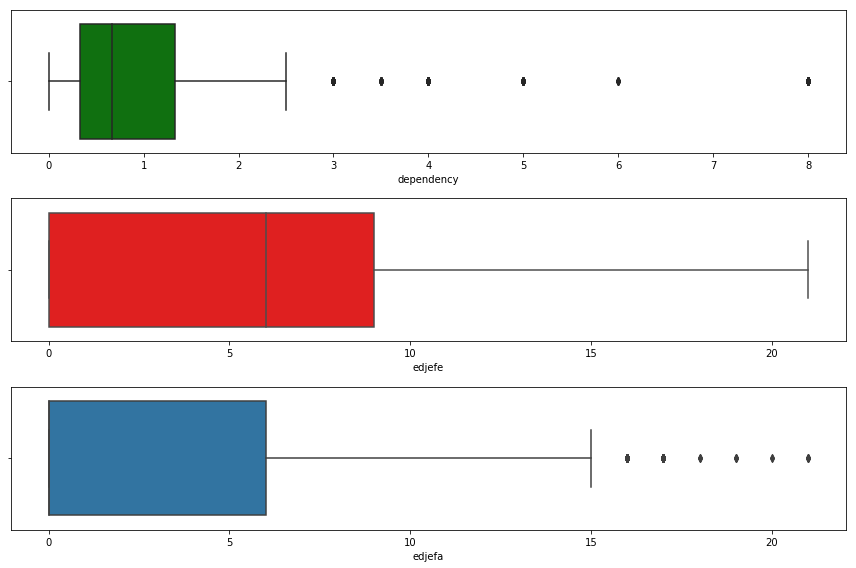

In [51]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(311)
# ax1.set_title('dependency')

ax2 = fig.add_subplot(312)
# ax2.set_title('edjefe')

ax3 = fig.add_subplot(313)
# ax3.set_title('edjefa')

sns.boxplot(x='dependency', data=train, color='g', ax=ax1);
sns.boxplot(x='edjefe', data=train, color='r',ax=ax2);
sns.boxplot(x='edjefa', data=train, ax=ax3);

plt.tight_layout()

### Як видно, сильних викидів немає

## Зробимо препродакшин object для test на основі висновків, які отримали вище

In [67]:
test.select_dtypes(include='object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


count    7352.000000
mean        3.244831
std         1.583022
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
dtype: float64


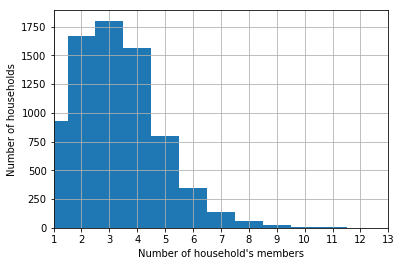

In [72]:
households = test.groupby('idhogar').apply(lambda x: len(x))
print(households.describe())
plt.hist(households, bins=range(1, 13), align='left')
plt.xlabel("Number of household's members")
plt.ylabel('Number of households')
plt.grid(True)
plt.xlim([1, 13])
plt.xticks(range(1, 14))
plt.show()

In [100]:
di = {"yes": 1, "no": 0}
test['dependency'].replace(di, inplace=True)
test['edjefe'].replace(di, inplace=True)
test['edjefa'].replace(di, inplace=True)

In [101]:
test['dependency'] = test['dependency'].astype(float)
test['edjefe'] = test['edjefe'].astype(float)
test['edjefa'] = test['edjefa'].astype(float)

In [102]:
print(test['dependency'].unique())
print(test['edjefe'].unique())
print(test['edjefa'].unique())

[0.5        0.         8.         1.         0.25       2.
 0.33333334 0.375      0.60000002 1.5        0.2        0.75
 0.66666669 3.         0.14285715 0.40000001 0.80000001 1.6666666
 0.2857143  1.25       2.5        5.         0.85714287 1.3333334
 0.16666667 4.         0.125      0.83333331 2.3333333  7.
 1.2        3.5        2.25       3.3333333  6.        ]
[ 0. 16. 10.  6. 11.  8. 13. 14.  5.  3.  9. 17. 15.  7. 21.  4. 12.  2.
 20.  1. 19. 18.]
[17.  0. 11. 14. 10. 15.  9.  6.  8.  3.  2.  5. 16. 12.  1.  7. 13. 21.
  4. 19. 18. 20.]


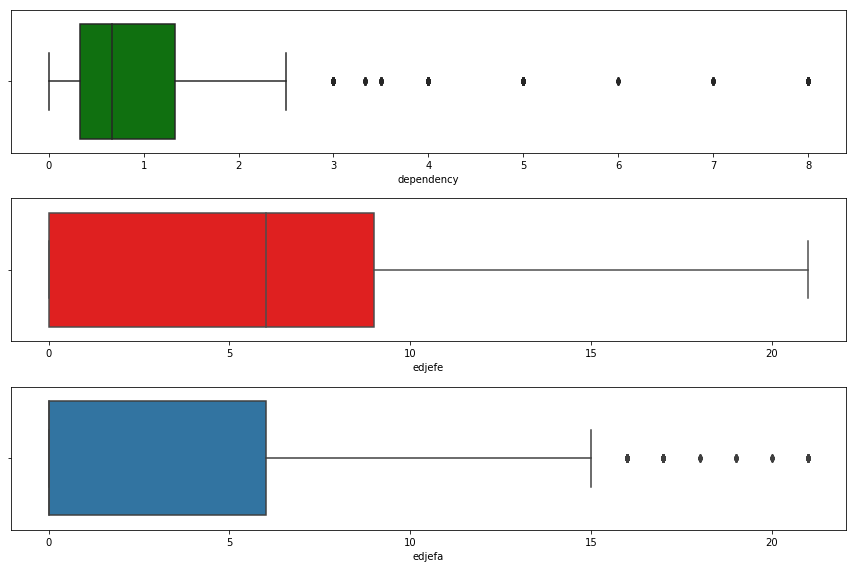

In [71]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(311)
# ax1.set_title('dependency')

ax2 = fig.add_subplot(312)
# ax2.set_title('edjefe')

ax3 = fig.add_subplot(313)
# ax3.set_title('edjefa')

sns.boxplot(x='dependency', data=test, color='g', ax=ax1);
sns.boxplot(x='edjefe', data=test, color='r',ax=ax2);
sns.boxplot(x='edjefa', data=test, ax=ax3);

plt.tight_layout()

## Розглянемо детально числові ознаки

In [103]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


##  Пропуски

In [104]:
numerical = train.select_dtypes(exclude='object').columns

In [105]:
train[numerical].isnull().sum().sort_values(ascending = False).head(10)

rez_esc            7928
v18q1              7342
v2a1               6860
meaneduc              5
SQBmeaned             5
techoentrepiso        0
techocane             0
techootro             0
cielorazo             0
abastaguadentro       0
dtype: int64

### Тільки 5 ознак містять пропуски, детально глянем на останні дві ознаки: 'SQBmeaned, meaneduc'

In [106]:
train[['SQBmeaned', 'meaneduc']].describe()

,SQBmeaned,meaneduc
count,9552.000000,9552.000000
mean,102.588867,9.231523
std,93.516890,4.167694
min,0.000000,0.000000
25%,36.000000,6.000000
50%,81.000000,9.000000
75%,134.560010,11.600000
max,1369.000000,37.000000


### Як видно пропуски в ознаці 'SQBmeaned' потрібно замінити на медіанне значення, в ознаку 'meaneduc' на середнє:

In [107]:
train['meaneduc'].fillna(train['meaneduc'].mean(), inplace = True)
train['SQBmeaned'].fillna(train['SQBmeaned'].median(), inplace = True)

### Значення пропусків для решти ознак замінюємо на 0:

In [108]:
train['rez_esc'].fillna(0, inplace = True)
train['v18q1'].fillna(0, inplace = True)
train['v2a1'].fillna(0, inplace = True)

In [109]:
train[numerical].isnull().sum().sum()

0

## Зробимо препродакшин number для test на основі висновків, які отримали вище

In [110]:
numerical = test.select_dtypes(exclude='object').columns
test[numerical].isnull().sum().sort_values(ascending = False).head(10)

rez_esc       19653
v18q1         18126
v2a1          17403
meaneduc         31
SQBmeaned        31
v14a              0
sanitario6        0
techocane         0
techootro         0
cielorazo         0
dtype: int64

In [111]:
test[['SQBmeaned', 'meaneduc']].describe()

,SQBmeaned,meaneduc
count,23825.000000,23825.000000
mean,100.509220,9.157474
std,89.211063,4.080513
min,0.000000,0.000000
25%,36.000000,6.000000
50%,75.111115,8.666667
75%,132.250000,11.500000
max,1296.000000,36.000000


In [112]:
test['meaneduc'].fillna(test['meaneduc'].mean(), inplace = True)
test['SQBmeaned'].fillna(test['SQBmeaned'].median(), inplace = True)

In [113]:
test['rez_esc'].fillna(0, inplace = True)
test['v18q1'].fillna(0, inplace = True)
test['v2a1'].fillna(0, inplace = True)

## Для початку пробуємо прості алгоритми без створення нових фіч

In [114]:
y = train['Target']

train.drop(['Target', 'Id', 'idhogar'], axis=1, inplace=True)

In [115]:
X = train[train.columns]

### Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [117]:
rf = RandomForestClassifier(random_state=17, n_jobs=-1).fit(X, y)

In [118]:
accuracy_score(y, rf.predict(X))

0.9975933870461442

In [121]:
test.drop(['Id', 'idhogar'], axis=1, inplace=True)

In [122]:
X_test = test[test.columns]

In [123]:
rf_pred = rf.predict(X_test)

In [125]:
test_2 = pd.read_csv("E:/Install/Statistics/Kaggle Inter-American Development Bank/test.csv/test.csv")

In [130]:
d = {'Id': test_2['Id'], 'Target': rf_pred}

In [131]:
submission_df = pd.DataFrame(data=d)
submission_df.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [133]:
submission_df.to_csv('Kaggle_IADB_Competition_01.csv', sep=',', index=False)